<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_3_lesson/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія

## Визначення
Регресія -- це алгоритм **моделювання зв'язку** між залежною числовою ознакою та однією чи декількома залежними ознаками.

Мета лінійної регресії – знайти **лінійний зв’язок** між змінними, який можна використовувати для прогнозування залежної ознаки.

##Типи лінійної регресії
Існує два типи лінійної регресії: **проста** лінійна регресія та **множинна** лінійна регресія. Проста лінійна регресія включає лише одну незалежну змінну, тоді як множинна лінійна регресія включає дві або більше незалежних змінних.

## Проста лінійна регресія


$$y = \beta + \alpha*X $$

де:

* $y$ – залежна змінна
* $X$ – незалежна змінна
* $\beta$ – зсув (intercept)
* $\alpha$ – ваговий множник(нахил, intercept)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

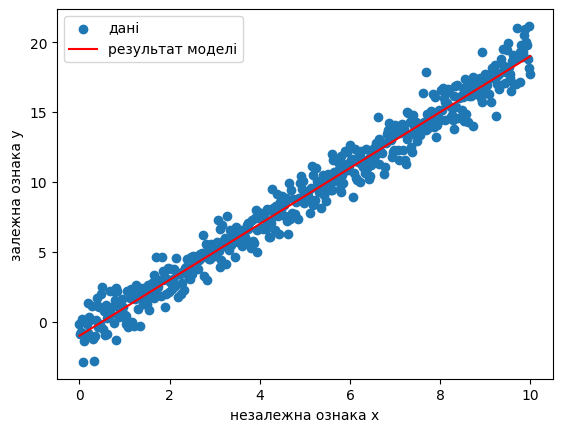

In [2]:
x = np.linspace(0, 10, 500)

y = 2*x - 1 + np.random.normal(size=x.shape)

plt.scatter(x, y, label="дані")
plt.plot([0, 10], [-1, 19], c="red", label="результат моделі")
plt.xlabel("незалежна ознака x")
plt.ylabel("залежна ознака y")
plt.legend()

## Множинна лінійна регресія

$$Y = \beta + \alpha_1*X_1 + \alpha_2*X_2 + \cdots + \alpha_n*X_n$$

де:
* $Y:$ залежна змінна
* $X_1, X_2, X_3, X_4:$ Незалежні змінні
* $\beta:$ зсув (intercept)
* $\alpha_1, \alpha_2, \cdots, \alpha_n:$ коефіцієнти(вагові множники, coefficients)

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

# Приклад 1

Дані про дохід від продажу морозива за день та температуру надворі

[джерело](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue/data?select=IceCreamData.csv)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/IceCreamData.csv")

In [5]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
df.shape

(500, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## Точкова діаграма

Text(0, 0.5, 'pevenue')

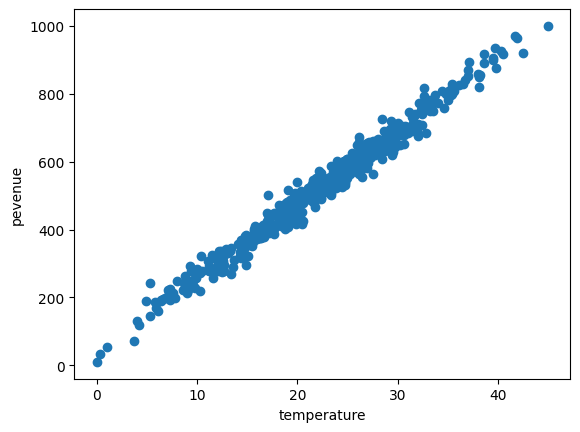

In [9]:
plt.scatter(df['Temperature'], df['Revenue'])
plt.xlabel('temperature')
plt.ylabel('pevenue')

## Тренування моделі

###Поділ даних на залежну та незалежну ознаки

In [10]:
y = df['Revenue']
X = df.drop(columns='Revenue')

### Поділ на тренувальні та тестові дані

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42) # зерно для генератора випадкових чисел

###Модель

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

LinearRegression()

## Результат

In [13]:
model.coef_

array([21.38197386])

In [14]:
model.intercept_

46.80464127742374

<div align="center"><font size='6'> Дохід = 21.4*Температура + 46.8 </font></div>

## Використання

In [15]:
my_temperature = 25

In [16]:
model.predict([[my_temperature]]) # треба передавати 2D масив або таблицю pandas.DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([581.35398766])

In [17]:
21.4*my_temperature + 46.8

581.8

##Метрики

Метрики -- це числові характеристики для оцінки ефективності моделі:

* Середнє квадратичне відхилення (MSE)
* Корінь середньоквадратичного відхилення (RMSE).
* Середнє абсолютне відхилення (MAE).
* R² або коефіцієнт детермінації.
* Скоригований R²

### Середня абсолютне відхилення:

MAE — це модуль різниці між цільовим значенням і значенням, передбаченим моделлю.

MAE більш стійие до викидів і не штрафує за помилки так сильно, як mse.

MAE — це лінійна оцінка, яка означає, що всі індивідуальні відмінності зважені однаково.

Він не підходить для задач, де потрібно приділяти більше уваги викидам.

<img src = "https://miro.medium.com/proxy/0*zX9jlpZ8k0CuEpFE.jpg">

### Середнє квадратичне відхилення:

`MSE або середнє квадратичне відхилення` є однією із найбільш частовживаних метрик для завдань регресії.

Це просто середнє значення квадрата різниці між цільовим значенням і значенням, передбаченим регресійною моделлю.

Зводячи різницю в квадрат, він штрафує навіть невелику помилку, яка призводить до переоцінки того, наскільки погана модель.

Дану метрику часто використовують також тому, що вона є диференційованою(пізніше обговоримо).


<img src = "https://miro.medium.com/max/875/0*aTUPK_ILg7-n0znw.jpg">

### Корінь середньо квадратичного відхилення:

RMSE є найбільш широко використовуваною метрикою для задач регресії та є квадратним коренем із середньо квадратичного відхилення між цільовим значенням і значенням, передбаченим моделлю.

У деяких випадках це краще, тому що помилки спочатку зводяться в квадрат перед усередненням, що створює високий штраф за великі помилки.

Це означає, що RMSE є корисним, коли чутливість моделі до великих помилок небажана.

<img src = "https://miro.medium.com/max/650/0*TO7BkvQwtnvVzkK4.png">

### R²

Коефіцієнт детермінації або R² — ще один показник, який використовується для оцінки ефективності регресійної моделі.

Метрика допомагає нам порівнювати наскільки краща наша модель за базову модель, яка завжди прогнозує середнє арифметичне, або медіану.

R² – це безмасштабна оцінка, яка означає, що значення R² завжди буде меншим або дорівнює 1, не має значення, чи є значення занадто великими чи занадто малими.

Значення в 1 означає, що модель хороша, 0 - що така сама як базова

<img src = "https://miro.medium.com/max/783/0*_Bk3m941thWlveS3.png">

### Скоригований R²:

Скоригований R² має те саме значення, що й R², але є його вдосконаленням.

R² страждає від проблеми, пов’язаної з підвищенням значенням при збільшені кількості незалежних ознак, навіть якщо модель не покращується, що може ввести дослідника в оману.

Скоригований R² завжди нижчий за R², оскільки він коригується з урахуванням кількості ознак і показує покращення, лише якщо є реальне покращення.

<img src = "https://miro.medium.com/max/495/0*WkdWEm2993yhYvUA.png">

In [18]:
def mae(y_true, y_pred):
  residual = y_true - y_pred

  return residual.abs().mean()

In [19]:
def mse(y_true, y_pred):
  residual = y_true - y_pred

  return (residual**2).mean()

In [20]:
def rmse(y_true, y_pred):
  return mse(y_true, y_pred) ** 0.5

In [21]:
def r2(y_true, y_pred):
  y_mean = y_true.mean()

  return 1 - mse(y_true, y_pred) / mse(y_true, y_mean)

In [22]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [23]:
y_pred = model.predict(X_test)

In [24]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [25]:
all_metrics

,train,test
MAE,19.70,19.18
RMSE,24.83,25.54
R2,0.98,0.98


# Приклад 2

Дані про ціну діамантів

[джерело]()

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

In [27]:
df.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


![](https://www.datocms-assets.com/25216/1654106726-m-diamond-cut-1125x540.jpg)

In [28]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13793
Very Good,12083
Good,4906
Fair,1610


In [29]:
y = df['price']
X = df.drop(columns='price')

In [30]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


## Обробка категоріальних ознак

In [31]:
X = pd.get_dummies(X)
X.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,False,False,True,False,False
1,0.21,False,False,False,True,False
2,0.23,False,True,False,False,False
3,0.29,False,False,False,True,False
4,0.31,False,True,False,False,False


## Тренування моделі

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [34]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

In [35]:
all_metrics

,train,test
MAE,990.15,978.43
RMSE,1519.42,1479.17
R2,0.86,0.86


In [36]:
df.describe()

,carat,price
count,53943.000000,53943.000000
mean,0.797935,3932.734294
std,0.473999,3989.338447
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.000000
max,5.010000,18823.000000


## Коефіцієнти

In [37]:
model.coef_

array([ 7.86588552e+03, -2.63641125e+16, -2.63641125e+16, -2.63641125e+16,
       -2.63641125e+16, -2.63641125e+16])

In [38]:
pd.DataFrame({"coef": model.coef_}, index=X.columns)

,coef
carat,7.865886e+03
cut_Fair,-2.636411e+16
cut_Good,-2.636411e+16
cut_Ideal,-2.636411e+16
cut_Premium,-2.636411e+16
cut_Very Good,-2.636411e+16


In [39]:
model.intercept_

2.6364112508416144e+16

## Покращення

In [40]:
#Будемо шукати лише коефіцієнти, а зсув вважатимемо рівним нулю
model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [41]:
all_metrics["train without intercept"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test without intercept"] = get_metrics(y_test, model.predict(X_test))
all_metrics

,train,test,train without intercept,test without intercept
MAE,990.15,978.43,990.44,978.55
RMSE,1519.42,1479.17,1519.34,1479.06
R2,0.86,0.86,0.86,0.86


In [42]:
pd.DataFrame({"coef": model.coef_}, index=X.columns)

,coef
carat,7865.885520
cut_Fair,-3828.703812
cut_Good,-2737.775074
cut_Ideal,-2064.145855
cut_Premium,-2435.540191
cut_Very Good,-2357.359277


## Сама модель

<div align="center"><font size='6'> Для Fair:     Ціна = 7865*Карат - 3828 </font></div>
<div align="center"><font size='6'> Для Good:      Ціна = 7865*Карат - 2737 </font></div>
<div align="center"><font size='6'> Для Very Good: Ціна = 7865*Карат - 2357 </font></div>
<div align="center"><font size='6'> Для Premium:   Ціна = 7865*Карат - 2435 </font></div>
<div align="center"><font size='6'> Для Ideal:     Ціна = 7865*Карат - 2064 </font></div>




Гранювання |Модель
-----------|---------------------------
Fair       |Ціна = 7865*Карат - 3828
Good       |Ціна = 7865*Карат - 2737
Very Good  |Ціна = 7865*Карат - 2357
Premium    |Ціна = 7865*Карат - 2435
Ideal      |Ціна = 7865*Карат - 2064

## Використання

In [43]:
sample = X.sample(1)
sample

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
13024,0.26,False,False,False,False,True


In [44]:
model.predict(sample)

array([-312.22904179])

In [45]:
7865*sample['carat'] - 2064

,carat
13024,-19.1


## Проблема

In [46]:
sample = df[['carat', 'cut']].sample(1)
sample

,carat,cut
11473,0.9,Ideal


In [47]:
pd.get_dummies(sample)

,carat,cut_Ideal
11473,0.9,True


## Рішення

In [48]:
y = df['price']
X = df.drop(columns='price')

In [49]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse_output=False)
encoder.set_output(transform='pandas')

#encoder = OneHotEncoder()

OneHotEncoder(sparse_output=False)

In [52]:
X[['cut']]

,cut
0,Ideal
1,Premium
2,Good
3,Premium
4,Good
...,...
53938,Premium
53939,Ideal
53940,Premium
53941,Premium


In [53]:
encoder.fit(X[['cut']])

OneHotEncoder(sparse_output=False)

In [54]:
sample

,carat,cut
11473,0.9,Ideal


In [55]:
encoder.transform(sample[['cut']])

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
11473,0.0,0.0,1.0,0.0,0.0


# Приклад 3

Що робити коли є пропущені значення в даних?

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

Штучно добавимо пропущені значення в наші дані

In [57]:
for column in df.columns:
  mask = np.random.binomial(1, 0.05, size=df.shape[0]).astype(bool)
  df.loc[mask, column] = np.nan

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   51252 non-null  float64
 1   cut     51239 non-null  object 
 2   price   51267 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [59]:
df.head()

,carat,cut,price
0,0.23,Ideal,326.0
1,0.21,Premium,326.0
2,0.23,Good,327.0
3,0.29,Premium,334.0
4,0.31,Good,335.0


## Видалення рядків з невідомим значенням у

Видаляємо ті рядки, в яких пропущені значення в стовпчику у(те що наша модель повинна прогнозувати)

In [60]:
df.dropna(subset=['price'], inplace=True)

In [61]:
y = df['price']
X = df.drop(columns='price')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

## Заповнення пропусків

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Для початку нам потрібно отримати назви стовпчиків з числовими та категоріальними ознаками, тому що для них обробка буде відрізнятися

In [64]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

Для числових ознак заповнюємо пропущені значення в кожному стовпчику його медіаною.

В параметр `steps` передаємо список кортежів з двлма значеннями: назва кроку та сам крок(об'єкт який здійснює обробку)

[(назва1, крок1),

 (назва2, крок2),

  ...
  
  ]

In [65]:
num_transformer = Pipeline(
    steps=[('inpute', SimpleImputer(strategy='median'))]
)

Для категоріальних ознак застосовуємо наступну обробку:
* заповнюємо пропущені значення в кожному стовпчику значенням, яке найчастіше зустрічається
* застосовуємо кодування OneHotEncoder

In [66]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())])

In [67]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False))])

Об'єднуємо обробку числових і категоріальних ознак в одну

В параметр `transformers` передаємо список кортежів з трьома значеннями: назва трансформера, сам трансформер, назви або індекси стовпчиків до яких це застосовувати

[(назва1, трансформер1, стовпчики1),

 (назва2, трансформер2, стовпчики2),

  ...
  
  ]

In [68]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inpute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['carat'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['cut'], dtype='object'))])

In [69]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

,num__carat,cat__cut_Fair,cat__cut_Good,cat__cut_Ideal,cat__cut_Premium,cat__cut_Very Good
30007,0.43,0.0,0.0,0.0,0.0,1.0
2898,0.92,0.0,0.0,1.0,0.0,0.0
52772,0.80,0.0,0.0,1.0,0.0,0.0
28493,0.30,0.0,0.0,1.0,0.0,0.0
18440,1.55,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
11878,0.95,0.0,0.0,0.0,0.0,1.0
47078,0.52,0.0,0.0,1.0,0.0,0.0
40161,0.32,0.0,0.0,1.0,0.0,0.0
903,0.71,0.0,0.0,1.0,0.0,0.0


Створюємо нову модель

In [70]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

In [71]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

## Використання

In [72]:
sample = pd.DataFrame({'carat': [np.nan], 'cut': [np.nan]})
sample

,carat,cut
0,NaN,NaN


In [73]:
model.predict(sample)

array([3409.])

## Збереження

In [74]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [75]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['cut'], dtype='object'))])),
                ('model', LinearRegression())])

# Попередня обробка даних

Попередня обробка даних - це важливий крок у конвеєрі науки про дані. Вона передбачає перетворення необроблених даних у чистий і придатний для використання формат, що робить їх готовими для аналізу або навчання моделей. Ось чому ви повинні виконувати попередню обробку даних і як ефективно працювати з різними типами даних.

## Чому потрібно попередньо обробляти дані

Дані часто надходять у різних форматах і містять неузгодженості, пропущені значення та шум. Попередня обробка допомагає

- **Покращити продуктивність моделі**: Чисті дані можуть призвести до кращої точності прогнозування.
- **Впоратися з відсутніми значеннями**: Вирішити, як обробити або врахувати відсутні дані.
- **Нормалізувати дані**: Переконайтеся, що числові характеристики мають узгоджену шкалу.
- **Перетворення категоріальних даних**: Перетворіть категоріальні змінні в числові представлення, зрозумілі моделям машинного навчання.
- **Зменшити перенавчання**: Спрощення моделі та зменшення шуму в даних.

## Категоріальна обробка

### OneHotEncoder

**Опис**: Ця методика перетворює категоріальні змінні у формат, який може бути наданий алгоритмам ML для кращого прогнозування.

- **Параметри**:
  - `categories`: Визначає категорії для кодування.
  - `drop`: Може відкинути одну з категорій, щоб уникнути мультиколінеарності.
  - `sparse`: Якщо встановлено в True, повертає розріджену матрицю; якщо False, повертає щільний масив.
  - `handle_unknown`: Визначає поведінку для невідомих категорій під час перетворення (варіанти: 'error', 'ignore').

<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png width='300%', height='300%'>
</div>

### OrdinalEncoder

**Опис**: Використовується для порядкових категорійних ознак, де категорії мають значущий порядок (наприклад, «низький», «середній», «високий»).

- **Параметри**:
  - `categories`: Визначає категорії та їх порядок.
  - `handle_unknown`: Визначає поведінку для невідомих категорій під час перетворення.

<div>
<img src=https://datasciencedojo.com/wp-content/uploads/Categorical-data-encoding-label-encoding.png width='50%', height='50%'>
</div>

## Числова обробка

### StandardScaler

**Опис**: Стандартизує ознаки шляхом вилучення середнього значення та масштабування до одиничної дисперсії.

- Параметри**:
  - `copy`: Якщо значення True, робиться копія даних; якщо False, змінює вхідні дані.
  - `with_mean`: Якщо True, вирівнювання даних по центру перед масштабуванням.
  - `with_std`: Якщо True, масштабування до одиничної дисперсії.

<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*mViMXFWPqg7Vg2WwjaoKVQ.png width='50%', height='50%'>
</div>

### PowerTransform

**Опис**: Застосовує степеневе перетворення, щоб зробити дані більш гауссівськими.

- **Параметри**:
  - `метод`: Може бути 'box-cox' (тільки для додатних даних) або 'yeo-johnson' (може обробляти від'ємні значення).
  - `standardize`: Якщо значення True, масштабує перетворені дані так, щоб вони мали нульове середнє та одиничну дисперсію.


<div>
<img src=https://media.geeksforgeeks.org/wp-content/uploads/20200531232546/output275.png width='70%', height='70%'>
</div>

### QuantileTransformer

**Опис**: Перетворює ознаки відповідно до рівномірного або нормального розподілу на основі квантилів даних.

- **Параметри**:
  - `n_quantiles`: Кількість квантилів для створення.
  - `output_distribution`: Може бути «uniform» або «normal».
  - `copy`: Якщо значення True, створюється копія даних.

<div>
<img src=https://www.tandfonline.com/cms/asset/b2af5d97-9625-45f7-9a34-cf0da9b2e600/cjas_a_1630372_f0003_oc.jpg width='50%' height='50%'>
</div>

### PolynomialFeatures

**Опис**: Генерує поліноміальні функції та функції взаємодії, що дозволяє створювати більш складні моделі.

- **Параметри**:
  - `degree`: Степінь поліноміальних функцій (наприклад, 2 для квадратичних).
  - `include_bias`: Якщо значення True, включає стовпчик одиницями.
  - `interaction_only`: Якщо значення True, створюються лише особливості взаємодії.

приклад перетворення двох стовпчиків (X, Y)

`interaction_only = True`  - $X, Y, XY$

`interaction_only = False` - $X, Y, X^2, Y^2, XY$

In [87]:
from sklearn.preprocessing import PolynomialFeatures

encoder = PolynomialFeatures(interaction_only=False, degree=2)
encoder.set_output(transform='pandas')

df1 = df.dropna()
encoder.fit_transform(df1[['carat', 'price']])

,1,carat,price,carat^2,carat price,price^2
0,1.0,0.23,326.0,0.0529,74.98,106276.0
1,1.0,0.21,326.0,0.0441,68.46,106276.0
2,1.0,0.23,327.0,0.0529,75.21,106929.0
3,1.0,0.29,334.0,0.0841,96.86,111556.0
4,1.0,0.31,335.0,0.0961,103.85,112225.0
...,...,...,...,...,...,...
53938,1.0,0.86,2757.0,0.7396,2371.02,7601049.0
53939,1.0,0.75,2757.0,0.5625,2067.75,7601049.0
53940,1.0,0.71,2756.0,0.5041,1956.76,7595536.0
53941,1.0,0.71,2756.0,0.5041,1956.76,7595536.0


### FuncTransformer

FuncTransformer - це універсальний інструмент у scikit-learn, який дозволяє вам застосовувати кастомні перетворення до ваших даних. Ви можете використовувати його для застосування таких функцій, як квадратний корінь, піднесення до квадрату або будь-яких інших математичних перетворень.

In [95]:
from sklearn.preprocessing import FunctionTransformer


def transform(X):
    return np.hstack([np.sqrt(X), X, X**2])

def features_output(encoder, names):
    sqrt_names = [f'sqrt_{name}' for name in names]
    normal_names = [f'{name}' for name in names]
    squared_names = [f'{name}^2' for name in names]

    return sqrt_names + normal_names + squared_names


encoder = FunctionTransformer(func=transform,
                              feature_names_out=features_output)
encoder.set_output(transform='pandas')

encoder.fit_transform(df[['carat', 'price']])

,sqrt_carat,sqrt_price,carat,price,carat^2,price^2
0,0.479583,18.055470,0.23,326.0,0.0529,106276.0
1,0.458258,18.055470,0.21,326.0,0.0441,106276.0
2,0.479583,18.083141,0.23,327.0,0.0529,106929.0
3,0.538516,18.275667,0.29,334.0,0.0841,111556.0
4,0.556776,18.303005,0.31,335.0,0.0961,112225.0
...,...,...,...,...,...,...
53938,0.927362,52.507142,0.86,2757.0,0.7396,7601049.0
53939,0.866025,52.507142,0.75,2757.0,0.5625,7601049.0
53940,0.842615,52.497619,0.71,2756.0,0.5041,7595536.0
53941,0.842615,52.497619,0.71,2756.0,0.5041,7595536.0


#Припущення лінійної регресії
Перш ніж будувати модель лінійної регресії, важливо переконатися, що дані задовольняють певним вимогам або припущенням. Ці припущення включають **лінійність, незалежність, гомоскедастичність** і **нормальність**.



Гомоскедастичність: Дисперсія залишків має бути постійною на всіх рівнях незалежних змінних. Іншими словами, розкид залишків має бути однаковим для всіх прогнозованих значень.
Нормальність: залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а розподіл залишків має нагадувати дзвоноподібну криву.
Відсутність мультиколінеарності: незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

###Лінійність:
Зв’язок між незалежною ознакою y та залежною ознакою(бо ознаками) X має бути лінійним. Іншими словами, кожна ознака X повинна мати досить високий коефіцієнт кореляції Пірсона з ознакою y.

###Відсутність мультиколінеарності:
Незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

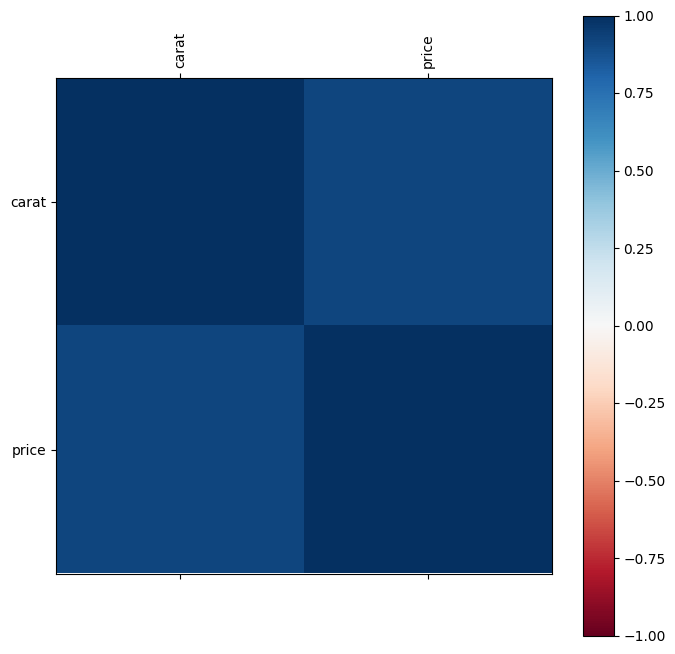

In [76]:
num_df = df.select_dtypes(include='number')
corr = num_df.corr(method="pearson")

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

###Нормальність всіх ознак:
Всі ознаки повинні мати нормальний(або гаусовий) розподіл. Це означає, що їхні гістограми повинні нагадувати симетричну дзвоноподібну криву.

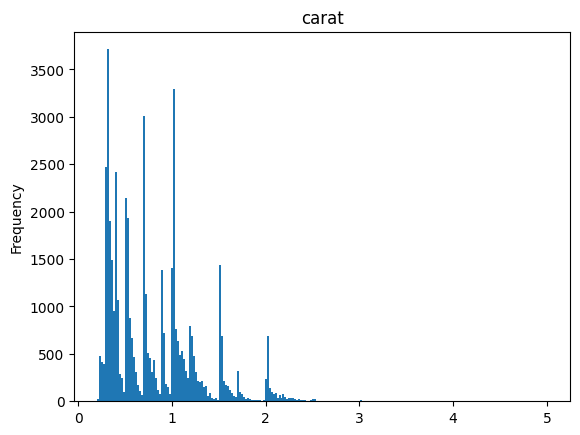

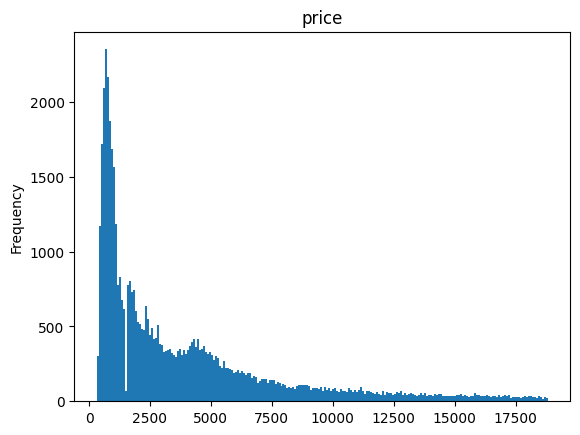

In [77]:
bins = int(np.sqrt(len(df)))

for column in df.columns:
  if df.dtypes[column] in (int, float):
    df[column].plot(kind="hist", bins=bins)
    plt.title(column)
    plt.show()

###Незалежність залишків:
Залишки (різниця між прогнозованими та фактичними значеннями) мають бути незалежними один від одного. Це означає, що помилка в прогнозуванні однієї точки даних не повинна впливати на помилку в прогнозуванні іншої точки даних.

Text(0.5, 1.0, 'Залишки - номер спостереження')

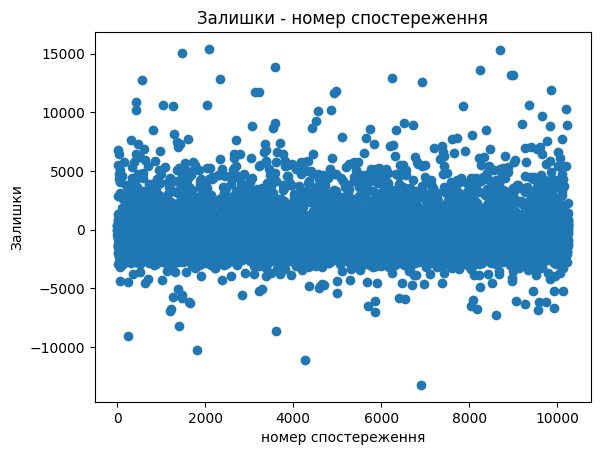

In [78]:
y_pred = model.predict(X_test)
res = y_test - y_pred

plt.scatter(range(len(res)), res)
plt.xlabel("номер спостереження")
plt.ylabel("Залишки")
plt.title("Залишки - номер спостереження")

###Однорідність дисперсії(Homoscedasticity):
Стандартне відхилення залишків має бути однаковим для всіх прогнозованих значень.

<img src="https://i.ibb.co/3dJ1Cpj/homoskedasticity.png">

Text(0.5, 1.0, 'Залишки - прогноз')

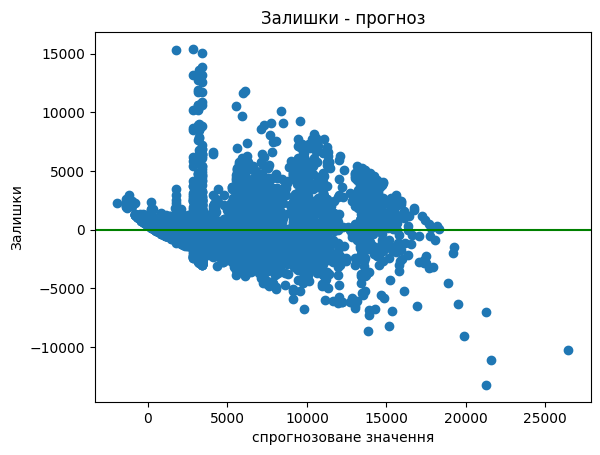

In [79]:
plt.scatter(y_pred, res)
plt.axhline(0, color="green")
plt.xlabel("спрогнозоване значення")
plt.ylabel("Залишки")
plt.title("Залишки - прогноз")

###Нормальність залишків:
Залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а гістограма залишків має нагадувати симетричну дзвоноподібну криву.

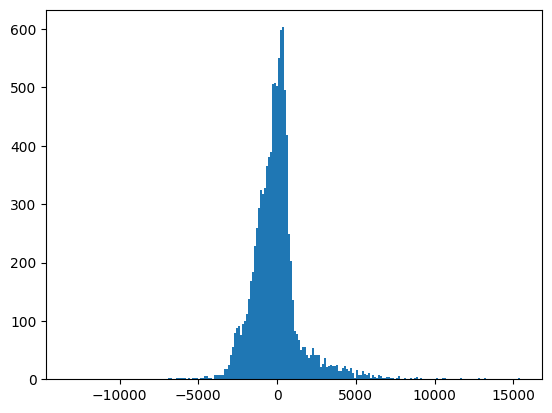

In [80]:
plt.hist(res, bins=bins)
plt.show()